<a href="https://colab.research.google.com/github/mikahanaki/alpha_STEP/blob/main/dansa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ｻﾝﾌﾟﾙﾃﾞｰﾀを読み込む

---

Githubからデータをクローン

カレントディレクトリを"dana_python"に移動して、

"dansa.py"と"dansa.txt"と同じディレクトリに移動

In [ ]:
!git clone https://github.com/mikahanaki/alpha_STEP.git
%cd alpha_STEP/dansa_python

Cloning into 'alpha_STEP'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.
/content/alpha_STEP/dansa_python


## 段差計ﾃﾞｰﾀをグラフ化・アウトプット

Google Colabの標準ではinstallされていないライブラリは，行頭に「!（エクスクラメーション・マーク）」のあとに「pip install ライブラリ名」で使えるようになる。


---



     |████████████████████████████████| 4.1 MB 3.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f2f4668cd63088204e1b4f0b7bbff52d0af3d1a2d9001561345aabed4f594bd5
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


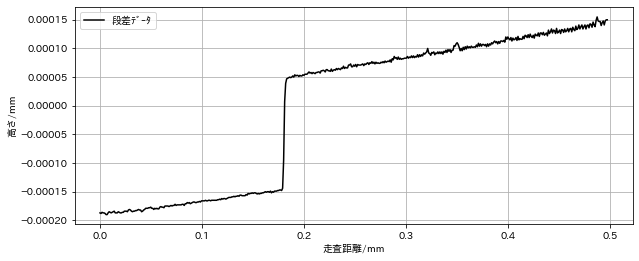

x:[-0.0248447,0.5217387],y:[-0.00020725000000000002,0.00017225]
file_out.csvへの出力完了


In [ ]:
# -*- coding: utf-8 -*-

#数値処理
import numpy as np

#データの可視化
from matplotlib import pyplot as plt

#madplotlibをColaboratoryで日本語表記する
!pip install japanize-matplotlib
import japanize_matplotlib

#"output"ﾌｫﾙﾀﾞを作成
import os
dirname = "output/"
os.makedirs(dirname, exist_ok=True) #既にﾌｫﾙﾀﾞが存在していてもERRORでない

#textﾃﾞｰﾀから値を読み込む（ファイル名、スキップする行、列単位でひとくくりにする）
#段差計ﾃﾞｰﾀはutf-8なのでそのまま使える
dansa01_axis1, dansa_value1= np.loadtxt("dansa.txt",skiprows=0,unpack=True)

#グラフ表示エリアの範囲設定（X方向,Y方向）単位はインチ
fig = plt.figure(figsize=(10, 4))

#グラフを何個表示して、何個目にプロットするか
ax = fig.add_subplot(111)

#グラフのマーカー、色、ラベルの設定
ax.plot(dansa01_axis1, dansa_value1, "-", color="k", label="段差ﾃﾞｰﾀ")

#軸のラベル設定
ax.set_xlabel("走査距離/mm")
ax.set_ylabel("高さ/mm")

#凡例の表示位置
ax.legend(loc="upper left")

#グリッドを表示しています。
plt.grid()

#グラフを表示
plt.show()

# グラフをimg.pngという名前の画像ファイルとして保存
#fig.savefig("img.png")
filename = dirname + "img.png"
fig.savefig(filename)

#描画範囲を取得する
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
print(f"x:[{xmin},{xmax}],y:[{ymin},{ymax}]")


#テキストデータをcsvに変換して出力する
import pandas as pd
read_text_file = pd.read_csv (r"dansa.txt")
read_text_file.to_csv (r"dansa.csv",  index=None)

#csvファイルのﾃﾞｰﾀをタブで区切って"dansa_out.csv"として出力
import csv
with open('dansa.csv', 'r', newline='') as filein, \
        open('output\dansa_out.csv', 'w', newline='') as fileout:
 
        reader = csv.reader(filein, delimiter='\t', skipinitialspace=True)
        writer = csv.writer(fileout)
 
        writer.writerows(reader)
        

#不要になった”dansa.csv"ファイルの削除
os.remove('dansa.csv')

print('file_out.csvへの出力完了')

